Summary
* Shape: (442, 10)
* Target range: 321
* Features ranges:
    range age: 0.217952307061173
    range sex: 0.0953217552468077
    range bmi: 0.2608305218791785
    range bp: 0.244443819255274
    range s1: 0.28069438307302996
    range s2: 0.31440105563669096
    range s3: 0.283486110914704
    range s4: 0.261628947010195
    range s5: 0.259696365573417
    range s6: 0.273379056379091

CS 455
Dr. Yoshigoe
Assignment 3
Simon Cole, Tyler Mcqueen, and Evan Karim

References:
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron
https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

Imports and loading data

In [111]:
import sklearn

import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

from sklearn.datasets import load_diabetes

diabetes = load_diabetes(return_X_y=False,as_frame=True)


Analyzing and understanding the data.
Feature descriptions: 
* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level
* The target is a quantatative progression of the disease one year after baseline.

In [112]:
print(list(diabetes))
diabetes.frame

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


Printing out mins, maxes, and means

In [122]:
mins = []
print("Minimums of each feature")
for i in diabetes.feature_names:
    minInFeature = min(diabetes.data[i])
    mins.append(minInFeature)
    print("min " + i + ": " + str(minInFeature))
    
maxes = []
print("\nMaximums of each feature")
for i in diabetes.feature_names:
    maxInFeature = max(diabetes.data[i])
    maxes.append(maxInFeature)
    print("max " + i + ": " + str(maxInFeature))
    
print("\nAverage value of each feature")
for i in diabetes.feature_names:
    avg = sum(diabetes.data[i]) / len(diabetes.data[i])
    print("avg " + i + ": " + str(avg))

print("\nRanges of each feature")
for i  in range(len(mins)):
    r = maxes[i] - mins[i]
    print("range " + diabetes.feature_names[i] + ": " + str(r))

targetRange = max(diabetes.target) - min(diabetes.target)
print(targetRange)

Minimums of each feature
min age: -0.107225631607358
min sex: -0.044641636506989
min bmi: -0.0902752958985185
min bp: -0.112399602060758
min s1: -0.126780669916514
min s2: -0.115613065979398
min s3: -0.10230705051742
min s4: -0.076394503750001
min s5: -0.126097385560409
min s6: -0.137767225690012

Maximums of each feature
max age: 0.110726675453815
max sex: 0.0506801187398187
max bmi: 0.17055522598066
max bp: 0.132044217194516
max s1: 0.153913713156516
max s2: 0.198787989657293
max s3: 0.181179060397284
max s4: 0.185234443260194
max s5: 0.133598980013008
max s6: 0.135611830689079

Average value of each feature
avg age: -3.6342849293088766e-16
avg sex: 1.3083425745511955e-16
avg bmi: -8.045349203335693e-16
avg bp: 1.2816545210746291e-16
avg s1: -8.835315586242054e-17
avg s2: 1.327024211984792e-16
avg s3: -4.574646342983182e-16
avg s4: 3.777301498233299e-16
avg s5: -3.8308542173050264e-16
avg s6: -3.412882015081407e-16

Ranges of each feature
range age: 0.217952307061173
range sex: 0.095

Plot correlations

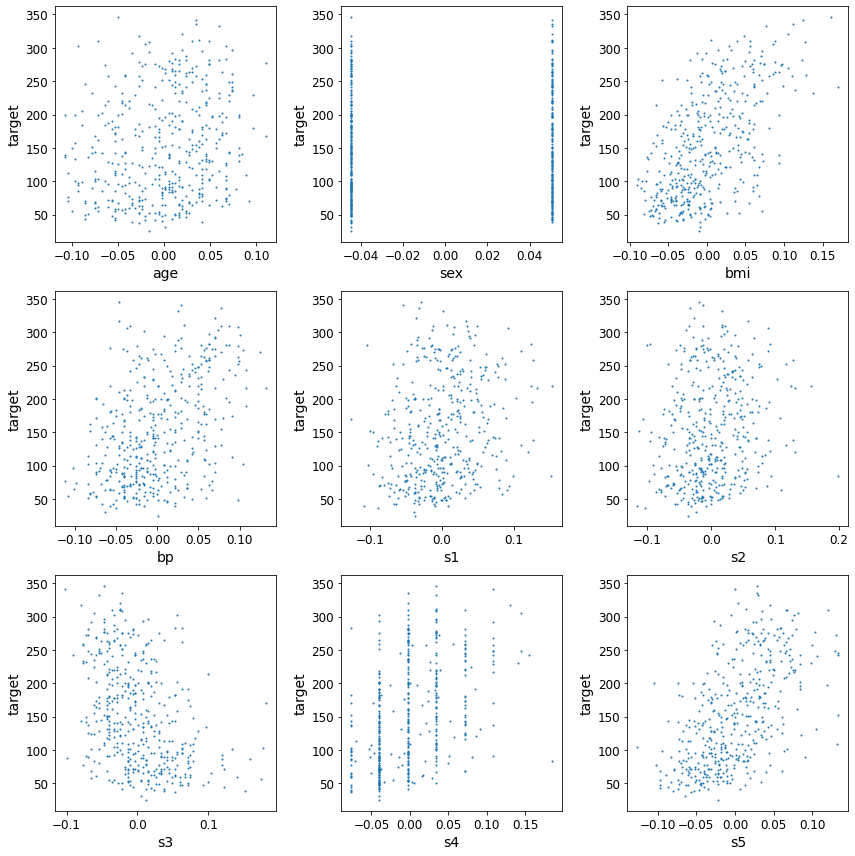

<Figure size 720x432 with 0 Axes>

In [ ]:
features = diabetes.feature_names

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(12, 12)


for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

Plot scatter matrix

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='bp', ylabel='age'>,
        <AxesSubplot:xlabel='s1', ylabel='age'>,
        <AxesSubplot:xlabel='s2', ylabel='age'>,
        <AxesSubplot:xlabel='s3', ylabel='age'>,
        <AxesSubplot:xlabel='s4', ylabel='age'>,
        <AxesSubplot:xlabel='s5', ylabel='age'>,
        <AxesSubplot:xlabel='s6', ylabel='age'>,
        <AxesSubplot:xlabel='target', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='bmi', ylabel='sex'>,
        <AxesSubplot:xlabel='bp', ylabel='sex'>,
        <AxesSubplot:xlabel='s1', ylabel='sex'>,
        <AxesSubplot:xlabel='s2', ylabel='sex'>,
        <AxesSubplot:xlabel='s3', ylabel='sex'>,
        <AxesSubplot:xlabel='s4', ylabel='sex'>,
        <AxesSubplot:xlabel='s5', ylabel='sex'>,
        <

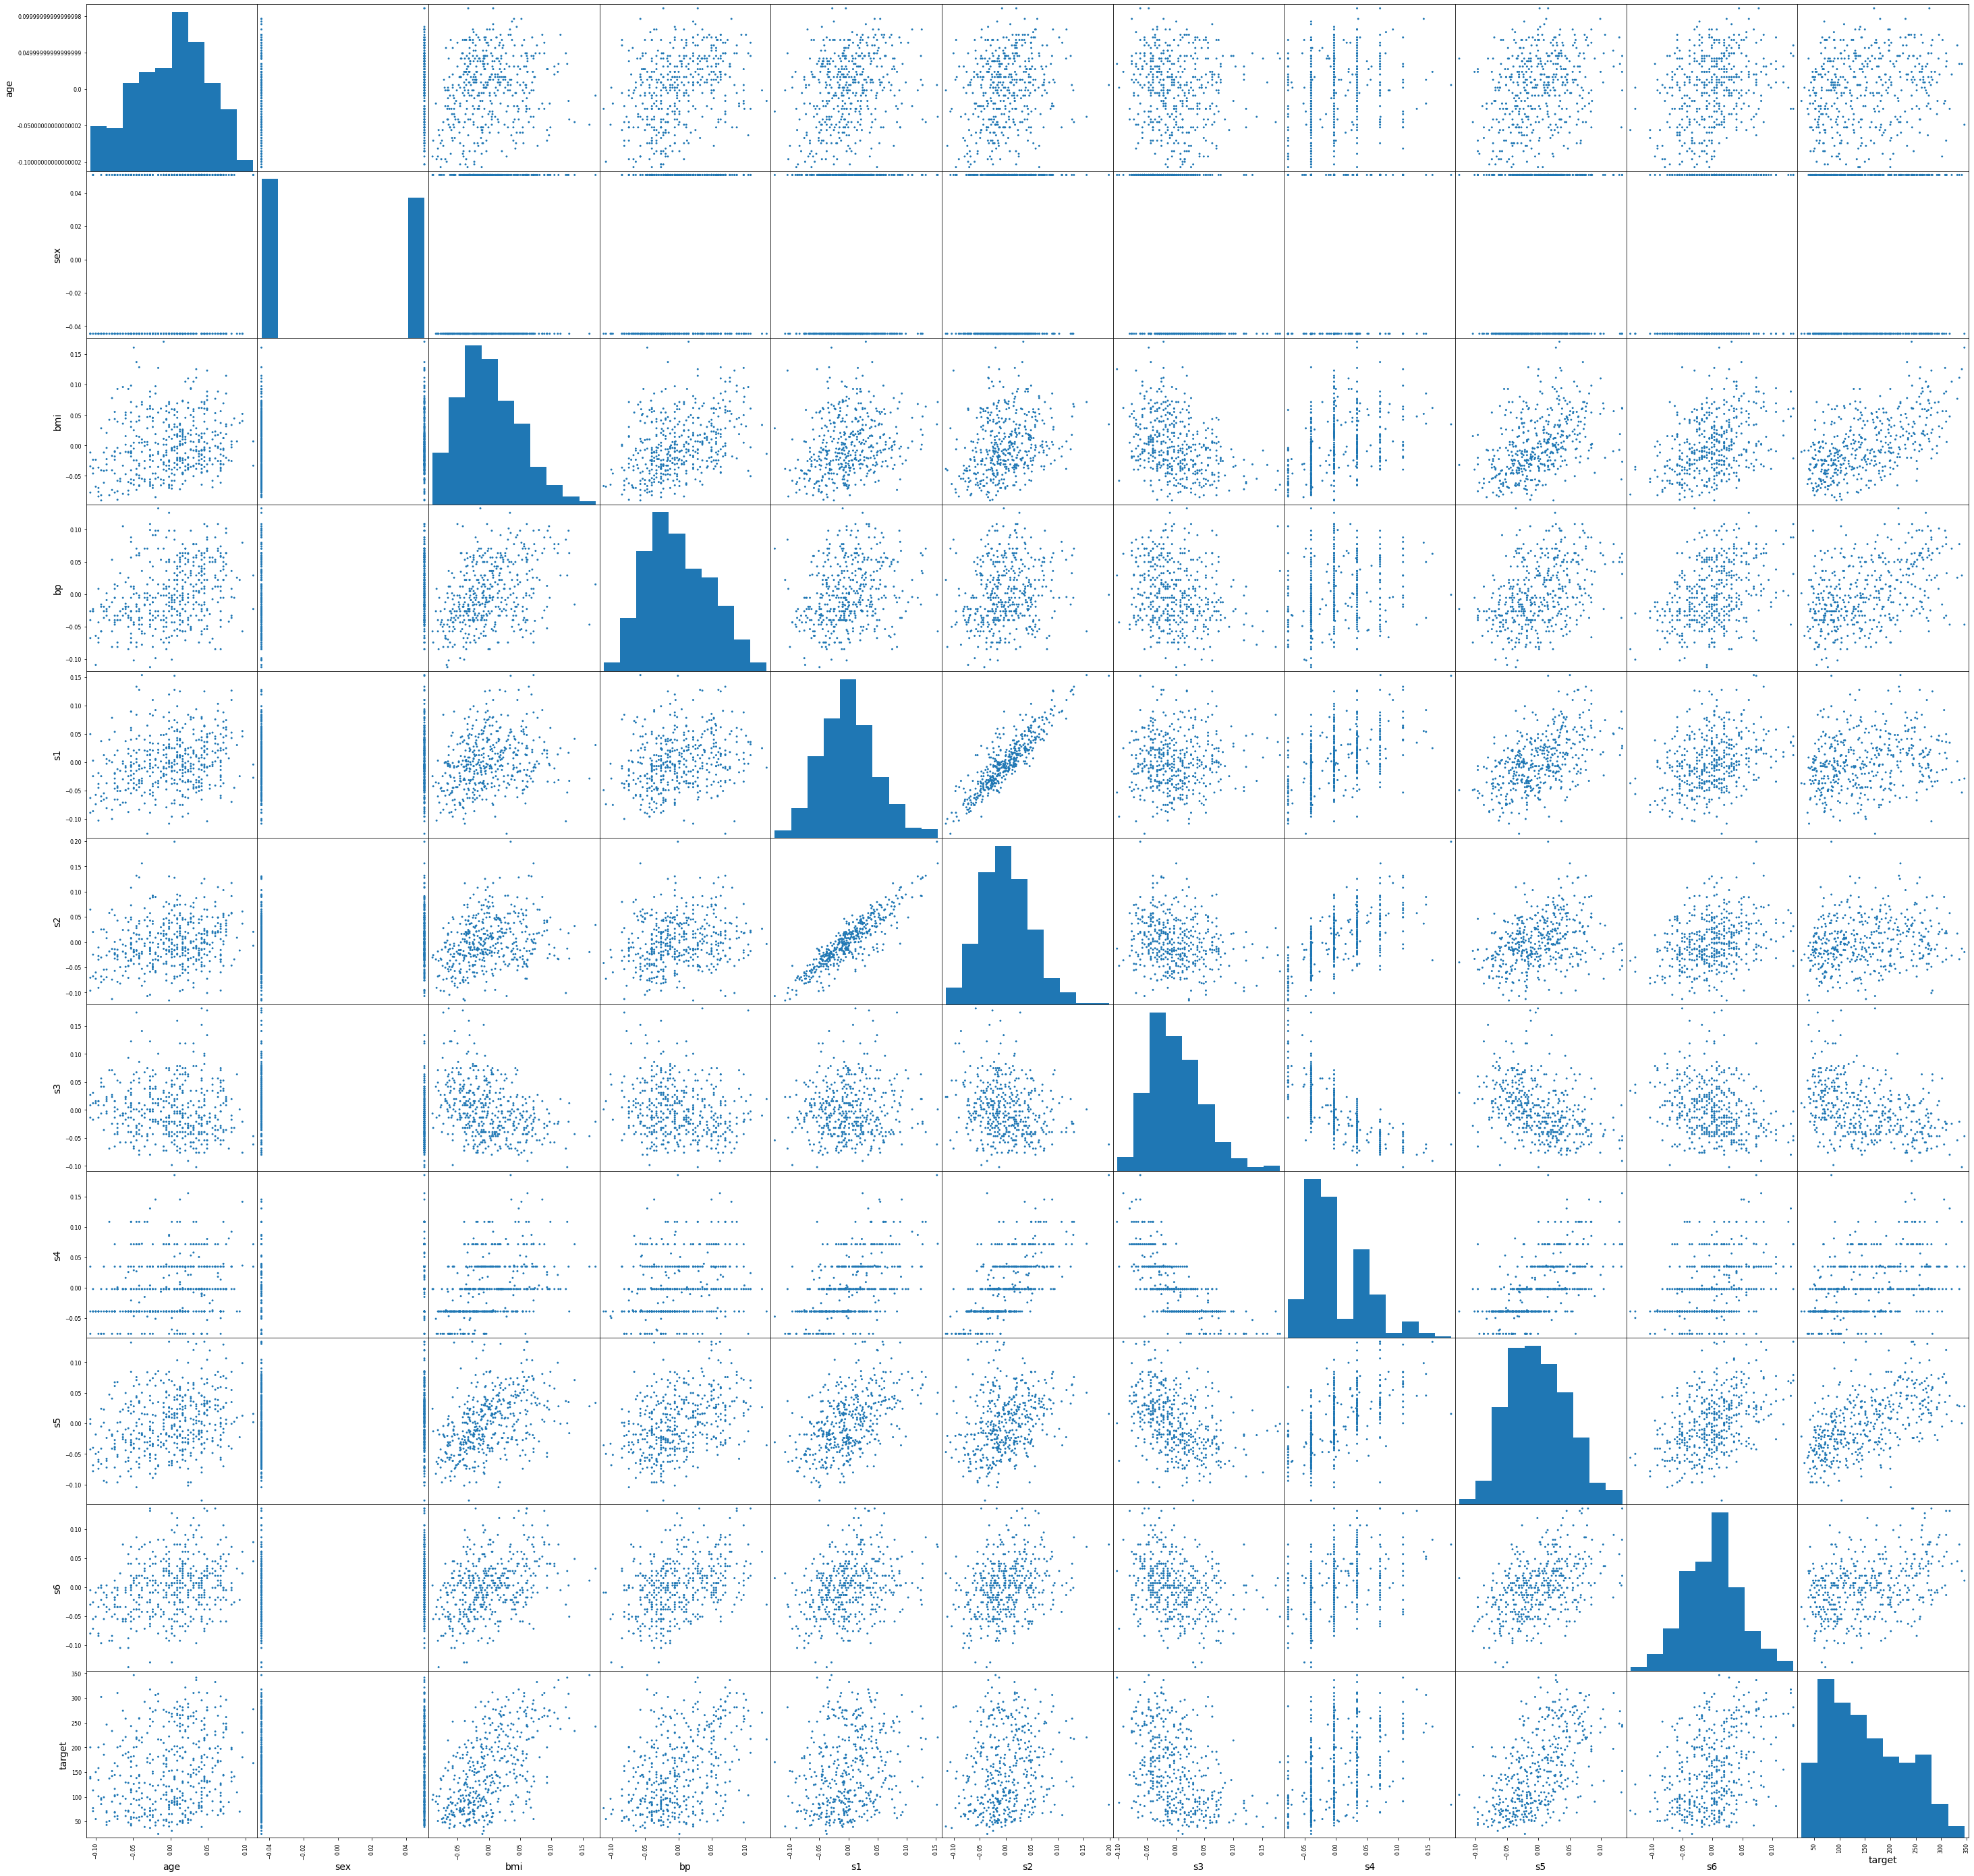

In [ ]:
pd.plotting.scatter_matrix(diabetes.frame, 1, [50, 50])

Implement plot learning curve function. Taken from textbook source in summary

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Defining X and y

In [ ]:
X = diabetes.data 
y = diabetes.target
r = np.ptp(X,axis=1)

print(r)
print(X.shape)
print(y.shape)

[0.1059197  0.16661561 0.13089836 0.1233718  0.06851323 0.13762298
 0.11359307 0.14473111 0.10179552 0.13863657 0.11149034 0.1676432
 0.0896001  0.06639883 0.15741046 0.16084866 0.1190532  0.11048796
 0.04204937 0.09252027 0.07235385 0.13611052 0.10829904 0.19005759
 0.09946389 0.11794783 0.1337759  0.10418222 0.12713408 0.16302093
 0.10445385 0.14109878 0.22759417 0.20852611 0.08363208 0.18683358
 0.09936564 0.08754558 0.11892653 0.12520814 0.11918342 0.12446209
 0.11068275 0.19498572 0.14774557 0.1014631  0.09252239 0.06600786
 0.12660891 0.14406393 0.079085   0.10134273 0.0974565  0.11471418
 0.10142675 0.15194463 0.08585941 0.15666146 0.25757356 0.09008335
 0.13098328 0.1514272  0.1420665  0.11495987 0.13062305 0.12565574
 0.14406393 0.06782696 0.09077944 0.09550325 0.14052679 0.16980011
 0.12064958 0.07339147 0.11297361 0.08167575 0.19685321 0.11183338
 0.12681552 0.12357331 0.11599818 0.08045082 0.17996076 0.06932021
 0.17444147 0.14289003 0.14711334 0.14114303 0.1369804  0.11528

Splitting data

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Creating the Standard scaler and scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Implementing linear regression model

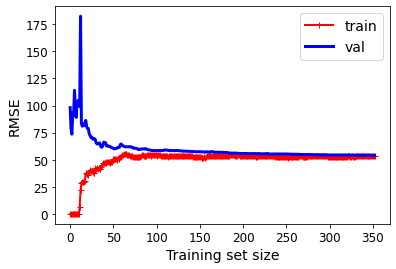

In [ ]:
from sklearn.linear_model import LinearRegression

linRegModel = LinearRegression().fit(X_train_scaled, y_train)
y_pred = linRegModel.predict(X_test_scaled)
plot_learning_curves(linRegModel, X, y)

Scoring linear regression

In [ ]:

mse = mean_squared_error(y_test, y_pred)
print(mse)

linRegModel.score(X_test_scaled, y_test)

2900.173287883232


0.45260660216173787

Implementing polynomial linear regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test)


In [ ]:
linRegModel = LinearRegression().fit(X_train_poly, y_train)
y_pred = linRegModel.predict(X_test_poly)

# linRegModel.intercept_, linRegModel.coef_

scoring polynomial linear regression

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

linRegModel.score(X_test_poly, y_test)

109761922.71264923


-20716.02131660929

reformatting plot_learning_curves to work for polynomial 

Text(0, 0.5, 'RMSE')

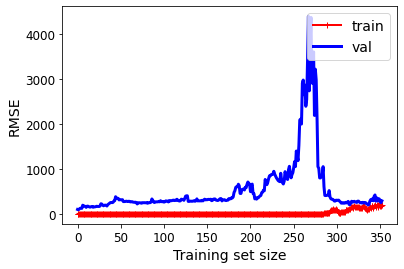

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
train_errors, test_errors = [], []
for m in range(1, len(X_train_poly) + 1):
    linRegModel.fit(X_train_poly[:m], y_train[:m])
    y_train_predict = linRegModel.predict(X_train_poly[:m])
    y_test_predict = linRegModel.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
plt.legend(loc="upper right", fontsize=14)   # not shown in the book
plt.xlabel("Training set size", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14)              # not shown

Ridge regularization

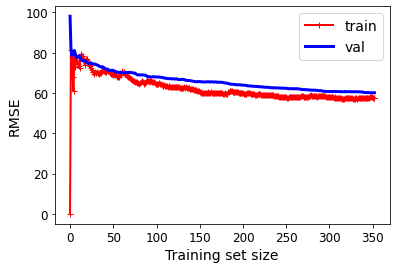

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train_scaled, y_train)
plot_learning_curves(ridge_reg, X, y)

Lasso regularization

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


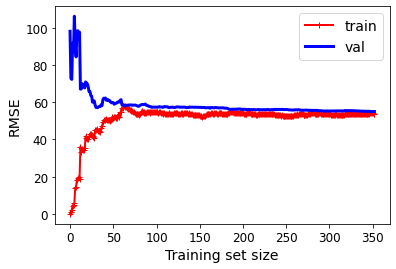

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

plot_learning_curves(lasso_reg, X, y)



Elastic net regularization

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


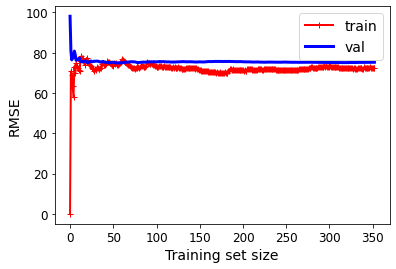

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

plot_learning_curves(elastic_net, X, y)
